<a href="https://colab.research.google.com/github/JanaAliCS/machine_leanring/blob/main/assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: K-Nearest Neighbors (KNN) & Linear Regression

This assignment focuses on **understanding two fundamental supervised learning algorithms — K-Nearest Neighbors (KNN)** and **Linear Regression** — using simple, interpretable datasets.

You will explore how both models learn from data, visualize their behavior, and reflect on how model parameters, noise, and outliers affect performance.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()

# Use only two features: sepal length and sepal width
X = iris.data[:, :2]
y = iris.target

# Convert to DataFrame for easier visualization
df = pd.DataFrame(X, columns=iris.feature_names[:2])
df['target'] = y
df.head()

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


---
## Question 1 (10 points): Visualize the Dataset

Create a scatter plot to visualize the relationship between the two features. Color each point by its class (target).

✏️ **Task:**
- Plot sepal length vs sepal width.  
- Use different colors for each class.  
- Label the axes and add a title.

In [2]:
# Your code here
import plotly.express as px

fig = px.scatter(
    df,
    x="sepal length (cm)",
    y="sepal width (cm)",
    color="target",
    title="Sepal Length Vs Width",
    labels={'sepal length (cm)': 'Length', 'sepal width (cm)': 'Width', 'target': 'Class'})
fig.show()

#for labels {'old name' : 'new name'}
#color = "feature name"  -> divides this feature by colors

---
## Question 2 (5 points): Split the Data

Split the dataset into **training (80%)** and **testing (20%)** sets.

✏️ **Task:**
- Use `train_test_split` from `sklearn.model_selection`.  
- Set a fixed `random_state` for reproducibility.  
- Print the number of samples in each set.

In [5]:
# Your code here
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#function len prints the # of samples for specified set
#the number of samples in x_train = y_train && x_test = y_test
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 120
Testing set size: 30


---
## Question 4 (10 points): Train a Baseline KNN Model

Train a KNN classifier using:
- `k = 5`
- The default distance metric (`minkowski`)

✏️ **Task:**
- Fit the model on your training data.  
- Predict on the test data.  
- Print the accuracy, confusion matrix, and classification report.

In [6]:
# Your code here
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#create/fit to model/predict knn classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

#evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)



Accuracy: 0.8
Confusion Matrix:
 [[10  0  0]
 [ 0  6  3]
 [ 0  3  8]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.67      0.67      0.67         9
           2       0.73      0.73      0.73        11

    accuracy                           0.80        30
   macro avg       0.80      0.80      0.80        30
weighted avg       0.80      0.80      0.80        30



---
## Question 5 (20 points): Effect of Different k Values

Experiment with different values of `k` from 1 to 20. Observe how model performance changes.

✏️ **Task:**
- Loop over `k` values from 1 to 20.  
- For each `k`, train and evaluate the model.  
- Record training and testing accuracy.  
- Plot both accuracies versus `k`.  



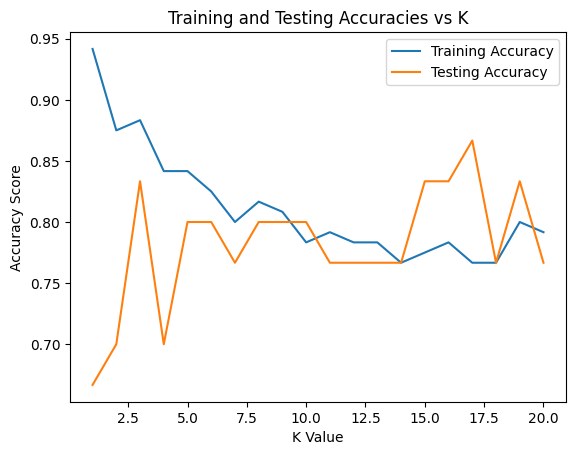

In [7]:
# Your code here

#creating lists for storage of accuracy scores for every k from 1-20
train_accuracy = []
test_accuracy = []

#function range (a, b) includes a but excludes b so we put 21 to include 20
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

#plot for training and testing accuracies vs each K
plt.plot(range(1, 21), train_accuracy, label='Training Accuracy')
plt.plot(range(1, 21), test_accuracy, label='Testing Accuracy')
plt.xlabel('K Value')
plt.ylabel('Accuracy Score')
plt.title('Training and Testing Accuracies vs K')

#legend is used to identify each line (written as a small box in the plot)
plt.legend()

plt.show()


In [9]:
results_df = pd.DataFrame({
    'k': range(1, 21),
    'Training Accuracy': train_accuracy,
    'Testing Accuracy': test_accuracy
})
results_df

,k,Training Accuracy,Testing Accuracy
0,1,0.941667,0.666667
1,2,0.875000,0.700000
2,3,0.883333,0.833333
3,4,0.841667,0.700000
4,5,0.841667,0.800000
5,6,0.825000,0.800000
6,7,0.800000,0.766667
7,8,0.816667,0.800000
8,9,0.808333,0.800000
9,10,0.783333,0.800000


💭 **Reflection:**
- Which value of `k` gives the best performance?  
- What happens when `k` is very small or very large?  
- How do these changes relate to **overfitting** and **underfitting**?

Answer:
  - For the testing accuracy list, the best value is 0.866667 which is at k = 17. For the training accuracy list, the best value is 0.941667 which is at k = 1.

  - When k is very small, the training set accuracy is high (eg: k= 1 has an accuracy of 0.9). While the testing set accuracy is at its lowest 0.6 at k = 1. Thus, it can be said that the model is overfitting as it is memorizing the training set well but is not able to generalize it to the test set.
  
  - When k is very large, the training set accuracy drops to a moderate level (0.7-0.8). The testing set rises to the same moderate level as its highest was at k = 17. Thus, it can be said that the model is underfitting because it has become too smooth since it's ignoring the small patterns as it's looking at too many neighbors and becomes less accurate.

---
## Question 6 (10 points): Visualize Decision Boundaries

Now that you have found the best value of `k`, let’s see how KNN separates the classes for different distance metrics.

✏️ **Task:**
- For each distance metric, plot how KNN divides the feature space.  
- Show the **regions** belonging to each class and the **test points** on top of them.  
- Compare how the boundaries change for each metric.

💡 **Hint:**  
You can use `np.meshgrid` to create a grid of coordinate points, then predict each point’s class using your trained KNN model.  
Visualize the result using `plt.contourf()` for colored regions and `plt.scatter()` to plot the test samples.


In [ ]:
# Your code here

---
## Q7 – Generate Synthetic Data (10 points)

Explore how **Linear Regression** behaves under different noise levels.

✏️ **Task:**
- Generate two synthetic datasets using `make_regression`:
  - **Scenario 1:** Low noise (`noise=10`)  
  - **Scenario 2:** High noise (`noise=50`)  
- **Visualize** each dataset using a scatter plot:
  - Plot the generated points for both scenarios on separate graphs.  
  - Label the axes and include a title indicating the noise level.

📊 **Hint Example:**
```python
print("--- Scenario 1: Low Noise Data ---")
X1, y1 = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

print("\n--- Scenario 2: High Noise Data ---")
X2, y2 = make_regression(n_samples=100, n_features=1, noise=50, random_state=42)
```

In [ ]:
# Your code here

---
## Q8 – Fit Linear Regression Models (20 points)

Now, let’s fit a Linear Regression model to both datasets.

✏️ **Task:**
- Fit one model to each dataset.
- Plot the fitted regression lines on top of the scatter plots.
- Compare visually how noise affects model fit.


In [ ]:
# Your code here

    ---
    ## Q9 – Analyze Model Parameters (15 points)

    Let’s compare the slope (coefficient) and bias (intercept) of both models.

    ✏️ **Task:**
    - Print slope and bias for each model.
    - Discuss how higher noise levels affect model stability and parameters


In [ ]:
# Your code here